In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pprint

In [2]:
h08dir = '/home/kajiyama/H08/H08_20230612'
SUF = '.gl5'
tag = '.pr5'
dtype = 'float32'
gl5shape = (2160, 4320)
hlfshape = (360, 720)
# ny, nx
rgnshape = (72, 72)
#
one = 0
two = 6
three = 46
four = 52
upperindex = (90-four)*12
lowerindex = (90-three)*12
leftindex = (180+one)*12
rightindex = (180+two)*12
print(upperindex, lowerindex, leftindex, rightindex)

456 528 2160 2232


In [3]:
# original
# map/org/Aoba/existing_origin.gl5
# map/org/Aoba/existing_destination_1.gl5
#
# prep_map_lcan_gl5.sh
# map/out/can_org_/canorg.x.within.1.CAMA.gl5
# map/out/can_org_/canorg.y.within.1.CAMA.gl5
# map/out/can_org_/canorg.l.within.1.CAMA.gl5
# map/out/can_des_/candes.l.within.1.CAMA.bin
# map/out/can_sco_/cansco.within.1.CAMA.gl5
# map/out/can_cnt_/cancnt.within.1.CAMA.gl5
#
# prep_map_K14_gl5.sh
# map/out/can_org_/canorg.l.canal.ext.gl5
# map/out/can_des_/canorg.l.canal.ext.bin
# map/out/can_org_/canorg.l.merged.ext.1.CAMA.gl5
# map/out/can_des_/candes.l.merged.ext.1.CAMA.bin

In [4]:
mrg_des_l_load_path = f"{h08dir}/map/out/can_des_/candes.l.merged.ext.1.CAMA.bin"
# このファイルはL座標の変換が必要になるため領域化には適していない
# orgの元ファイルを渡して，その値から計算するのがよいと考えられる
# またはexplicitを全く含んでいないファイルを渡して，implicitのみを標高データから計算したmergedファイルを領域モデルで作成性させる方法がよい

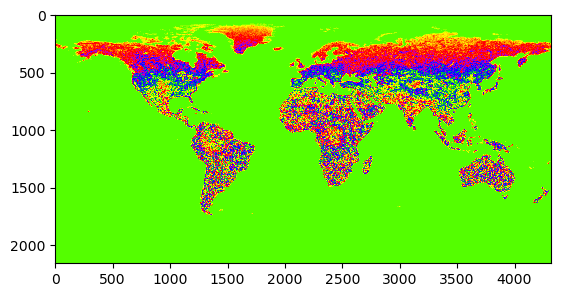

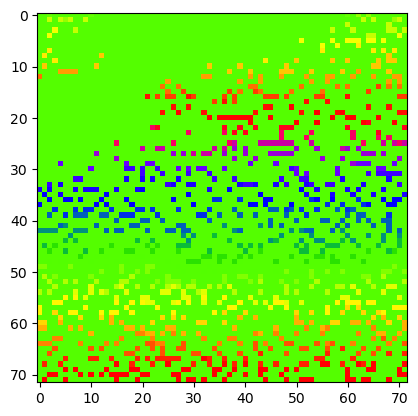

In [5]:
data = np.fromfile(mrg_des_l_load_path, dtype=dtype).reshape(120, 2160, 4320)
region = data[0, upperindex:lowerindex, leftindex:rightindex]
plt.imshow(data[0], cmap='prism_r')
plt.show()
plt.imshow(region, cmap='prism_r')

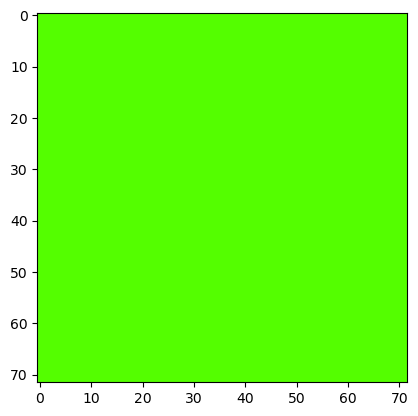

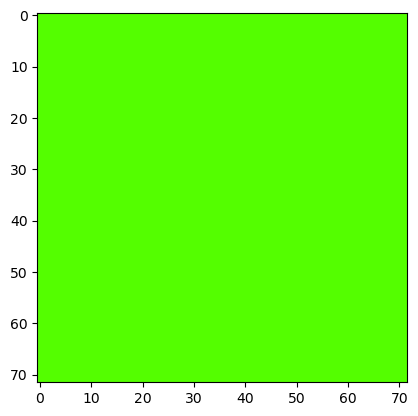

In [7]:
# original
origin_path = f'{h08dir}/map/org/Aoba/existing_origin{SUF}'
destination_path = f'{h08dir}/map/org/Aoba/existing_destination_1{SUF}'
path_list = [origin_path, destination_path]

origin = np.fromfile(origin_path, dtype=dtype).reshape(gl5shape)
org_cropped = origin[upperindex:lowerindex, leftindex:rightindex]
plt.imshow(org_cropped, cmap='prism_r')
plt.show()

destiantion = np.fromfile(destination_path, dtype=dtype).reshape(gl5shape)
des_cropped = destiantion[upperindex:lowerindex, leftindex:rightindex]
plt.imshow(des_cropped, cmap='prism_r')
plt.show()

In [8]:
# save the file
origin_save_path = f'{h08dir}/map/org/Aoba/region/existing_origin{tag}'
destination_save_path = f'{h08dir}/map/org/Aoba/region/existing_destination_1{tag}'
save_path_list = [origin_save_path, destination_save_path]

save_flag = False
if save_flag is True:
    for file_path, save_path in zip(path_list, save_path_list):
        loadfile = file_path
        savefile = save_path
        print(loadfile)
        print(savefile)
        data = np.fromfile(loadfile, dtype=dtype).reshape(gl5shape)
        region = data[upperindex:lowerindex, leftindex:rightindex]
        region.astype(np.float32).tofile(savefile)

/home/kajiyama/H08/H08_20230612/map/org/Aoba/existing_origin.gl5
/home/kajiyama/H08/H08_20230612/map/org/Aoba/region/existing_origin.pr5
/home/kajiyama/H08/H08_20230612/map/org/Aoba/existing_destination_1.gl5
/home/kajiyama/H08/H08_20230612/map/org/Aoba/region/existing_destination_1.pr5
